In [1]:
import os
from PIL import Image as img
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

#### Import the image to be compressed

In [2]:
image = img.open(os.path.abspath(".")  + '\input_picture.jpg')
image_array = np.array(image)
image_vector = np.reshape(image_array,(image_array.shape[0]*image_array.shape[1],image_array.shape[2])) 


#### Apply k-means algorithm  to the input vectorized image


In [3]:
number_kmeans = 2 # Define the number of k-means
t_start = time.time() 
kmeans = MiniBatchKMeans(n_clusters = number_kmeans,random_state = np.random.RandomState(0), max_iter = 15).fit(image_vector) # Compute the k-means
print('k_means computed in {} s'.format(round(time.time()-t_start, 2)))

k_means computed in 0.86 s


#### Assign each pixel of the input image to the corresponding centroid obtained with the kmeans algorithm

In [4]:
compressed_vector = kmeans.predict(image_vector) #Compute the new vectors (label to centroid)
new_vector = np.zeros((len(compressed_vector),3)) # Final vector with value of centroids

for i in range (len(new_vector)):
    for j in range (number_kmeans):
        if compressed_vector[i] == j:
            new_vector[i]=kmeans.cluster_centers_[j] #Assign the value of the centroid to the point
            
new_vector__reshape = np.reshape(new_vector,(image_array.shape[0],image_array.shape[1],3)) # Reshape for the image
new_vector_reshape_uint8 = new_vector__reshape.astype(np.uint8) #Convert in unt8
image_compressed = img.fromarray(new_vector_reshape_uint8)

#### Show and save the two images

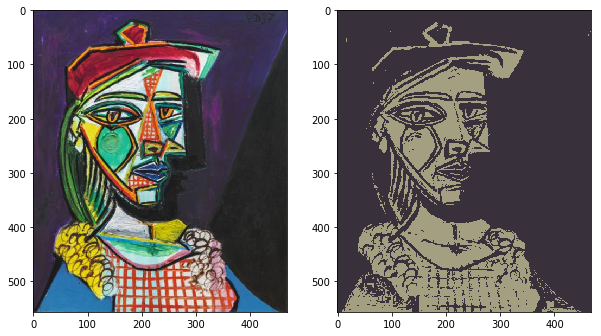

In [5]:
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.imshow(image)
f.add_subplot(1,2, 2)
plt.imshow(image_compressed)
plt.show(block=True)
f.savefig('comparison_images.jpg')
plt.close(f)